# 클래스 별 중요 Feature 뽑기
: 해당 클래스 = 1, 나머지 클래스 = 0 -(**SHAP**)-> 중요 Feature

In [1]:
import pandas as pd
import numpy as np

## data load

#### original

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


#### binary

In [ ]:
train = pd.read_csv('data/train_be.csv')
test = pd.read_csv('data/test_be.csv')

#### label

In [2]:
train = pd.read_csv('data/train_le.csv')
test = pd.read_csv('data/test_le.csv')

#### one-hot

In [ ]:
train = pd.read_csv('data/train_oe.csv')
test = pd.read_csv('data/test_oe.csv')

### data split

In [107]:
X = train.drop(['ID', 'SUBCLASS'], axis=1)
y = train['SUBCLASS']

### binary encoding

In [ ]:
import numpy as np
import pandas as pd

# y 값의 클래스 확인
y_classes = sorted(y.unique())  # y의 고유한 클래스 목록을 정렬
print(f"정렬된 클래스 목록: {y_classes}")

# 특정 n번째 클래스 선택 (예: n=0으로 설정)
n = 26
target_class = y_classes[n]
print(f"{n}번째 클래스: {target_class}")

# y 값이 target_class인 경우 1, 나머지는 0으로 변환
y_encoded = np.where(y == target_class, 1, 0)

# 디버깅: 인코딩된 값이 1인 샘플의 개수 출력
num_ones = np.sum(y_encoded)
print(f"'{target_class}'로 인코딩된 샘플의 개수: {num_ones}")

# 원래 y 값에서 target_class에 해당하는 샘플 개수
target_samples = np.sum(y == target_class)
print(f"'{target_class}'에 해당하는 원래 y 값의 개수: {target_samples}")

# 두 개수가 일치하는지 확인
if num_ones == target_samples:
    print("인코딩된 값과 원래 클래스 값의 개수가 일치합니다.")
else:
    print("인코딩된 값과 원래 클래스 값의 개수가 일치하지 않습니다.")

## calculate importance

In [ ]:
import shap
# SHAP의 JavaScript 시각화 라이브러리 로드
shap.initjs()

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Train/Test 데이터셋 분리
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# XGBoost 모델 학습 (이진 분류를 위한 objective 설정)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, objective='binary:logistic')
model.fit(X_train, y_train)

# SHAP explainer 생성
explainer = shap.TreeExplainer(model)

# SHAP 값을 계산 (이진 분류에서는 하나의 클래스에 대한 SHAP 값만 반환)
shap_values = explainer.shap_values(X_val)

# 1. SHAP summary plot (전체 피처 중요도 시각화)
shap.summary_plot(shap_values, X_val)

# 2. SHAP force plot (개별 샘플에 대한 피처 중요도)
# 첫 번째 샘플에 대한 force plot을 시각화
shap.force_plot(explainer.expected_value, shap_values[0], X_val.iloc[0])

In [ ]:
# 중요도 계산 및 리스트 반환
# SHAP 절대값을 평균 내어 피처별 중요도 계산
feature_importance = np.abs(shap_values).mean(axis=0)

# 중요도와 피처를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'SHAP Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='SHAP Importance', ascending=False)

# 중요도 순으로 피처와 중요도를 리스트로 반환
important_features = importance_df.values.tolist()

# 중요도 상위 10개 피처 출력
print(important_features[:30])

# RESULT: **important feature**

In [21]:
A2M_top30 = [['TP53', 0.30223625898361206], ['PIK3CA', 0.20690611004829407], ['PLEC', 0.1938256472349167], ['LRIG1', 0.18199189007282257], ['PCLO', 0.13049335777759552], ['ERCC2', 0.1262291818857193], ['NOTCH2', 0.11637954413890839], ['KRT8', 0.09722964465618134], ['NF1', 0.09493570029735565], ['CTNNB1', 0.08770091831684113], ['CR1', 0.08396568149328232], ['APOE', 0.08121097832918167], ['PTEN', 0.07722169905900955], ['HLA-B', 0.07677309215068817], ['PTPRJ', 0.07628869265317917], ['RYR1', 0.07352057844400406], ['IDUA', 0.0707436352968216], ['MAP1S', 0.07050572335720062], ['DMD', 0.07047687470912933], ['KMT2D', 0.06708334386348724], ['BRAF', 0.06570719927549362], ['NMU', 0.05059893801808357], ['AHNAK', 0.04662808030843735], ['OGFR', 0.04629452899098396], ['THEM4', 0.04417223483324051], ['VHL', 0.04240618273615837], ['IGSF3', 0.04056210443377495], ['SYNE1', 0.040482304990291595], ['PCNT', 0.030588852241635323], ['SPTA1', 0.029408371075987816]]
BLCA_top30 = [['TP53', 0.44356095790863037], ['KMT2D', 0.1347898542881012], ['CDKN1A', 0.12555396556854248], ['ERCC2', 0.12222879379987717], ['PCLO', 0.09194663166999817], ['ELF3', 0.09154430031776428], ['BRAF', 0.07803772389888763], ['SPTAN1', 0.07568500190973282], ['FGFR3', 0.07457087934017181], ['UTP20', 0.06807126104831696], ['TRIO', 0.06796466559171677], ['PCDHB1', 0.06418595463037491], ['TENM2', 0.05547046661376953], ['IDH1', 0.05406111106276512], ['PTEN', 0.05319877341389656], ['KLF5', 0.05188767984509468], ['PLEC', 0.05180245265364647], ['ACACA', 0.049956489354372025], ['ERBB3', 0.04832438379526138], ['ABCG4', 0.04803737252950668], ['RXRA', 0.04675790295004845], ['ATF6', 0.04629412293434143], ['FKBP5', 0.04433256760239601], ['LRP1', 0.04196620732545853], ['FARP1', 0.039953265339136124], ['APC', 0.03893439844250679], ['DMD', 0.035893842577934265], ['PAX4', 0.03401282802224159], ['ABCC3', 0.03261561319231987], ['MYH2', 0.030528921633958817]]
BRCA_top30 = [['PIK3CA', 0.3522494435310364], ['IDH1', 0.2117539495229721], ['VHL', 0.148471400141716], ['BRAF', 0.13192218542099], ['APC', 0.11678770184516907], ['TP53', 0.10843521356582642], ['CDH1', 0.09356988221406937], ['GATA3', 0.09113102406263351], ['MAP3K1', 0.07922046631574631], ['PCLO', 0.06799444556236267], ['CTNNB1', 0.05695677548646927], ['CDKN2A', 0.04033039137721062], ['EGFR', 0.03452543541789055], ['KMT2D', 0.029231388121843338], ['PKHD1', 0.024837151169776917], ['COL11A1', 0.024484887719154358], ['COL3A1', 0.024266697466373444], ['PTEN', 0.023555103689432144], ['NFE2L2', 0.02302776835858822], ['PDE4DIP', 0.022818593308329582], ['ADCY2', 0.02255077473819256], ['ATRX', 0.02104276791214943], ['MYH2', 0.020794028416275978], ['DCC', 0.020568639039993286], ['DOCK2', 0.01930720917880535], ['FBN2', 0.018002282828092575], ['AHNAK', 0.017657680436968803], ['RUNX1', 0.016995903104543686], ['NOTCH1', 0.016956664621829987], ['MKI67', 0.01667020097374916]]
CESC_top30 = [['TP53', 0.7179464101791382], ['BRAF', 0.1090899333357811], ['VHL', 0.10727258771657944], ['IDH1', 0.10710105299949646], ['FBXW7', 0.05435869097709656], ['PKD1', 0.05042147636413574], ['PIK3CA', 0.048664357513189316], ['APC', 0.04286845400929451], ['PEG3', 0.040951602160930634], ['NF1', 0.035075124353170395], ['RELN', 0.03463868424296379], ['VWF', 0.034021101891994476], ['MYH4', 0.03361360728740692], ['HLA-A', 0.031176136806607246], ['ADCY9', 0.029998792335391045], ['PTEN', 0.029120396822690964], ['BACH1', 0.028523540124297142], ['LAMA3', 0.026420921087265015], ['PLCB1', 0.0252002514898777], ['WIZ', 0.02360050566494465], ['LMAN1', 0.023523911833763123], ['AR', 0.02339773438870907], ['SH2B1', 0.02330690249800682], ['NAV2', 0.02261301875114441], ['SNAP91', 0.022008506581187248], ['ARPP21', 0.021888071671128273], ['PML', 0.021883266046643257], ['KIF1B', 0.02090398222208023], ['APOBEC3G', 0.02073688432574272], ['CREBBP', 0.02064533345401287]]
COAD_top30 = [['APC', 1.002011775970459], ['TP53', 0.33234071731567383], ['FBXW7', 0.13211311399936676], ['KMT2D', 0.10852690786123276], ['ATRX', 0.06898163259029388], ['PLEC', 0.060359612107276917], ['PTEN', 0.05835556611418724], ['PCLO', 0.054825738072395325], ['ENPP2', 0.05198100581765175], ['SYNE1', 0.05154956132173538], ['PTPRM', 0.04453170672059059], ['SMAD2', 0.04434991627931595], ['DNMT1', 0.04278283566236496], ['IL17RA', 0.04073195159435272], ['ERBB3', 0.04020044952630997], ['SOX9', 0.0399593822658062], ['MYH11', 0.039306577295064926], ['NF1', 0.03829817846417427], ['IDH1', 0.03810567408800125], ['COL11A1', 0.035303886979818344], ['RYR1', 0.03514596074819565], ['MYH2', 0.033295538276433945], ['CTNNA1', 0.03284456208348274], ['CDH8', 0.032368361949920654], ['SEMA4D', 0.030176378786563873], ['PNPT1', 0.02997669205069542], ['CYP2E1', 0.026416005566716194], ['FLNC', 0.02586945705115795], ['COL2A1', 0.023685382679104805], ['CDKN2A', 0.023661138489842415]]
DLBC_top30 = [['TP53', 0.5268849730491638], ['KMT2D', 0.2626476585865021], ['B2M', 0.2608725130558014], ['IGSF3', 0.2559141516685486], ['BTG2', 0.15749213099479675], ['PRDM1', 0.15469738841056824], ['DST', 0.14340850710868835], ['RYR2', 0.1368962675333023], ['LRIG1', 0.11316259950399399], ['PTPN6', 0.11065928637981415], ['IRF8', 0.09232868254184723], ['RYR1', 0.07214988768100739], ['ACTB', 0.06870031356811523], ['STAT3', 0.0501343198120594], ['DMD', 0.048260848969221115], ['LAMA3', 0.044223688542842865], ['CREBBP', 0.040367577224969864], ['SPTA1', 0.03834868595004082], ['FLNA', 0.028771577402949333], ['PIM1', 0.025550657883286476], ['FBXW7', 0.025485211983323097], ['BCL11B', 0.025063807144761086], ['MYC', 0.024335989728569984], ['PIK3CA', 0.023221861571073532], ['MXRA5', 0.021346308290958405], ['PEG3', 0.020514272153377533], ['LAMA1', 0.01950516551733017], ['DCC', 0.016893591731786728], ['ERCC5', 0.013614637777209282], ['MYO9B', 0.013242394663393497]]
GBMLGG_top30 = [['IDH1', 0.5457460284233093], ['PTEN', 0.24492694437503815], ['EGFR', 0.2264396846294403], ['APC', 0.11637705564498901], ['VHL', 0.10328687727451324], ['TP53', 0.07765514403581619], ['BRAF', 0.06622824817895889], ['DST', 0.05294598266482353], ['SPTA1', 0.052035752683877945], ['NF1', 0.04825208708643913], ['PIK3CA', 0.03760986402630806], ['CTNNB1', 0.03700249642133713], ['HUWE1', 0.0367373526096344], ['IDH2', 0.03480473533272743], ['SLC6A14', 0.029621921479701996], ['CACNA1A', 0.028643663972616196], ['MYH1', 0.022893154993653297], ['CDKN2A', 0.022273022681474686], ['RYR1', 0.02189072035253048], ['ABCB1', 0.020467551425099373], ['SEMA3C', 0.01941732130944729], ['ATRX', 0.01923869363963604], ['ERBB3', 0.018544001504778862], ['GREB1', 0.017555415630340576], ['RB1', 0.01735956221818924], ['LAMA2', 0.016775136813521385], ['MYH8', 0.015095515176653862], ['PKHD1', 0.01488521508872509], ['PCLO', 0.014861693605780602], ['TRIO', 0.014493634924292564]]
HNSC_top30 = [['TP53', 0.6360465288162231], ['IDH1', 0.14093585312366486], ['NOTCH1', 0.1125737726688385], ['CDKN2A', 0.10476420819759369], ['BRAF', 0.0918111577630043], ['PIK3CA', 0.08874967694282532], ['KMT2D', 0.08528057485818863], ['NF1', 0.08409266173839569], ['PTEN', 0.06371959298849106], ['COL7A1', 0.043060749769210815], ['CASP8', 0.03989804536104202], ['SPTA1', 0.039866313338279724], ['STEAP4', 0.03917951136827469], ['GNAS', 0.035215169191360474], ['VHL', 0.03221871703863144], ['LAMA2', 0.030893484130501747], ['IL16', 0.03077220730483532], ['APC', 0.0300481915473938], ['LTBP1', 0.029531190171837807], ['PCLO', 0.02753746509552002], ['DDC', 0.025256678462028503], ['NCOA6', 0.024838203564286232], ['YTHDC1', 0.024272402748465538], ['COL12A1', 0.024240832775831223], ['KALRN', 0.023835137486457825], ['PLEC', 0.02149622142314911], ['LCT', 0.021424926817417145], ['CYLD', 0.02115555852651596], ['HRAS', 0.020780248567461967], ['HGF', 0.02000458538532257]]
KIPAN_top30 = [['TP53', 0.5972372889518738], ['VHL', 0.31699642539024353], ['BRAF', 0.17436400055885315], ['PIK3CA', 0.13104915618896484], ['IDH1', 0.1283615231513977], ['PABPC1', 0.0682363212108612], ['PRKDC', 0.04971211403608322], ['CDC27', 0.04924730956554413], ['CTNNB1', 0.03977230191230774], ['CDH1', 0.035836488008499146], ['COL11A1', 0.03536846861243248], ['RYR2', 0.03429936245083809], ['APC', 0.031102830544114113], ['MXRA5', 0.030651727691292763], ['RNF213', 0.027394767850637436], ['ATRX', 0.02720130980014801], ['MET', 0.026371315121650696], ['RELN', 0.02572956681251526], ['PDE4DIP', 0.0239187590777874], ['DOCK4', 0.023567471653223038], ['NF1', 0.023442097008228302], ['GATA3', 0.02017471380531788], ['HSP90AB1', 0.01853836141526699], ['KCNK5', 0.018330199643969536], ['LTBP2', 0.018301302567124367], ['NEFH', 0.01741114631295204], ['KIT', 0.016380319371819496], ['MYH8', 0.01618054509162903], ['MYH1', 0.01567087136209011], ['HELZ2', 0.01563912257552147]]
KIRC_top30 = [['TP53', 0.7848750948905945], ['VHL', 0.4732185900211334], ['BRAF', 0.1404678225517273], ['PIK3CA', 0.12476196140050888], ['IDH1', 0.06977944821119308], ['RYR2', 0.06250924617052078], ['RYR1', 0.03199656307697296], ['PTPRD', 0.030609728768467903], ['CR1', 0.02820408344268799], ['FBXW7', 0.027436144649982452], ['CTNNB1', 0.027194857597351074], ['APC', 0.02496951073408127], ['PABPC1', 0.024192359298467636], ['LAMA1', 0.022691387683153152], ['RELN', 0.020503107458353043], ['COL11A1', 0.01869286596775055], ['CDH1', 0.018435915932059288], ['MYH2', 0.017035797238349915], ['MYH4', 0.016596617177128792], ['MAML1', 0.01588747277855873], ['DMD', 0.015634717419743538], ['ZNFX1', 0.014679928310215473], ['NFAT5', 0.014064117334783077], ['DCC', 0.01385668944567442], ['NFE2L2', 0.013826463371515274], ['MYH8', 0.013540700078010559], ['PRKDC', 0.013250188902020454], ['GREB1', 0.013218771666288376], ['ATRX', 0.01309637725353241], ['F8', 0.012952740304172039]]
LAML_top30 = [['TP53', 0.3391893208026886], ['PIK3CA', 0.2591380774974823], ['NPM1', 0.17821210622787476], ['BRAF', 0.13648557662963867], ['SYNE1', 0.11439099162817001], ['RYR2', 0.11386459320783615], ['VHL', 0.11135850846767426], ['PCLO', 0.1089361310005188], ['IDH2', 0.09336544573307037], ['ATRX', 0.08252572268247604], ['PTEN', 0.08141115307807922], ['RUNX1', 0.07568467408418655], ['DMD', 0.0632355585694313], ['KIT', 0.054340947419404984], ['IDH1', 0.05202623829245567], ['APC', 0.049279142171144485], ['SPTA1', 0.04724777489900589], ['DST', 0.04633655399084091], ['KMT2D', 0.046129193156957626], ['CEBPA', 0.036719709634780884], ['NOTCH1', 0.02864445559680462], ['NF1', 0.02279229275882244], ['CTNNB1', 0.02207503281533718], ['AHNAK', 0.021296802908182144], ['EGFR', 0.021006133407354355], ['NOTCH2', 0.01441026758402586], ['RYR1', 0.014063529670238495], ['LRP1', 0.012889482080936432], ['PRKDC', 0.012334919534623623], ['NOTCH3', 0.0115257753059268]]
LGG_top30 = [['IDH1', 1.387481927871704], ['IDH2', 0.15635085105895996], ['EGFR', 0.1148868277668953], ['PTEN', 0.08577840775251389], ['NF1', 0.0817498043179512], ['RYR1', 0.07068364322185516], ['BRAF', 0.06792806088924408], ['SPTA1', 0.06548111140727997], ['RYR2', 0.06295575201511383], ['SYNE1', 0.05622406303882599], ['TP53', 0.05255837365984917], ['NOTCH3', 0.0439995713531971], ['DMD', 0.037053197622299194], ['VHL', 0.03402698412537575], ['CREBBP', 0.031640905886888504], ['LRP1', 0.02785639651119709], ['COL11A1', 0.02575862407684326], ['APC', 0.02465597167611122], ['EFEMP2', 0.023156672716140747], ['SELE', 0.023073740303516388], ['MYH1', 0.021231364458799362], ['VCAN', 0.0172781590372324], ['NPM1', 0.016871768981218338], ['NOTCH1', 0.0153978755697608], ['FBN2', 0.015253395773470402], ['HUWE1', 0.015212630853056908], ['TG', 0.014477675780653954], ['PIK3CA', 0.014193864539265633], ['PTPN11', 0.013284118846058846], ['ABCC3', 0.01321275345981121]]
LIHC_top30 = [['CTNNB1', 0.24409520626068115], ['PIK3CA', 0.1485377997159958], ['BRAF', 0.14561083912849426], ['PTEN', 0.08984846621751785], ['APC', 0.07490479201078415], ['VHL', 0.06557536125183105], ['RYR2', 0.06407436728477478], ['PTPRD', 0.05611824616789818], ['ATRX', 0.05137437582015991], ['FBN2', 0.045598190277814865], ['FLNC', 0.04506989195942879], ['RB1', 0.04045386612415314], ['FASN', 0.03798987343907356], ['ALB', 0.03670908883213997], ['SYNE1', 0.03508191555738449], ['ITPR2', 0.03395862504839897], ['RPS6KA3', 0.03308674693107605], ['PEG3', 0.029118385165929794], ['OAS2', 0.029017863795161247], ['HSPA1L', 0.028324062004685402], ['IDH1', 0.0268951877951622], ['PTPRM', 0.026868611574172974], ['SPTBN1', 0.026150135323405266], ['ARID5B', 0.02374602109193802], ['NOTCH1', 0.023502681404352188], ['PRDM2', 0.02328626438975334], ['MYOF', 0.023085832595825195], ['GNAS', 0.023074565455317497], ['DOCK10', 0.02269391529262066], ['AFF1', 0.022158604115247726]]
LUAD_top30 = [['RYR2', 0.16513030230998993], ['PIK3CA', 0.1630159318447113], ['SYNE1', 0.12452594190835953], ['PTEN', 0.1130528524518013], ['IDH1', 0.08489303290843964], ['SPTA1', 0.0848272517323494], ['TP53', 0.07164038717746735], ['VHL', 0.06921394914388657], ['NLRP3', 0.06775156408548355], ['EGFR', 0.04394898936152458], ['EPHA5', 0.04121561720967293], ['PLPPR4', 0.038071051239967346], ['TLR7', 0.0360560268163681], ['ATXN1', 0.03406067192554474], ['ARPP21', 0.03162507340312004], ['THSD4', 0.029504723846912384], ['MKI67', 0.02946295030415058], ['DST', 0.027934769168496132], ['COL7A1', 0.02675587497651577], ['F8', 0.026695000007748604], ['MET', 0.026282817125320435], ['LONP1', 0.02566773071885109], ['RELN', 0.025299424305558205], ['FN1', 0.025271067395806313], ['TEX15', 0.02445407211780548], ['CROT', 0.02437392808496952], ['RYR1', 0.022988345474004745], ['ITGAL', 0.022193683311343193], ['MYH7', 0.022149918600916862], ['CELSR1', 0.02183770202100277]]
LUSC_top30 = [['TP53', 0.5323049426078796], ['RYR2', 0.25675609707832336], ['PDE4DIP', 0.08333715796470642], ['KMT2D', 0.081746906042099], ['BRAF', 0.07717233151197433], ['IDH1', 0.0735263079404831], ['LCT', 0.06847882270812988], ['CDKN2A', 0.06276585906744003], ['NFE2L2', 0.05949800834059715], ['PCLO', 0.0591551810503006], ['SPTA1', 0.0580359548330307], ['SYNE1', 0.05550701171159744], ['ACACA', 0.04773184284567833], ['MMP16', 0.044512756168842316], ['PIK3CG', 0.042249832302331924], ['APC', 0.041876718401908875], ['ANK1', 0.03940481320023537], ['MYH2', 0.036233268678188324], ['TENM2', 0.035282980650663376], ['COL11A1', 0.0344003327190876], ['PKHD1', 0.02999711222946644], ['VCPIP1', 0.02948913164436817], ['GRM8', 0.029382063075900078], ['IRF6', 0.02937093935906887], ['THBS2', 0.028675861656665802], ['ADCY2', 0.02764754183590412], ['DYNC1H1', 0.02638205513358116], ['CENPE', 0.026265263557434082], ['AKAP13', 0.026238350197672844], ['FN1', 0.026021938771009445]]
OV_top30 = [['TP53', 0.9049217104911804], ['PIK3CA', 0.22881607711315155], ['IDH1', 0.20302502810955048], ['PCLO', 0.08817481994628906], ['APC', 0.08558622002601624], ['BRAF', 0.08498135954141617], ['KMT2D', 0.0798678994178772], ['VHL', 0.06397335976362228], ['CDKN2A', 0.04655500873923302], ['ATRX', 0.04353434592485428], ['SYNE1', 0.0430455282330513], ['EFEMP1', 0.03728369250893593], ['PTEN', 0.03586393967270851], ['VWF', 0.03498656675219536], ['CTNNB1', 0.03486241027712822], ['FBN1', 0.02726689912378788], ['PTPRD', 0.024348458275198936], ['TNC', 0.023186398670077324], ['DYNC1H1', 0.022706227377057076], ['DMD', 0.022263288497924805], ['SPTA1', 0.020799649879336357], ['PLCL1', 0.020000658929347992], ['EPHA5', 0.01939978264272213], ['NOTCH1', 0.01885821297764778], ['RYR2', 0.017245646566152573], ['BRCA1', 0.01717955991625786], ['GNPAT', 0.016923798248171806], ['NOS1', 0.016415026038885117], ['CFH', 0.015823135152459145], ['COL11A1', 0.015683207660913467]]
PAAD_top30 = [['TP53', 0.6446034908294678], ['PIK3CA', 0.23876692354679108], ['CDKN2A', 0.17249204218387604], ['IDH1', 0.1541915088891983], ['KMT2D', 0.10480251163244247], ['RYR1', 0.07442529499530792], ['BRAF', 0.07238135486841202], ['PTEN', 0.06558762490749359], ['GNAS', 0.059741102159023285], ['APC', 0.05707155168056488], ['SYNE1', 0.05105243995785713], ['MYH2', 0.048475176095962524], ['ATRX', 0.047176580876111984], ['VHL', 0.046112630516290665], ['PLEC', 0.0458623431622982], ['COL6A3', 0.044997140765190125], ['HUWE1', 0.043173108249902725], ['CACNA1B', 0.042300447821617126], ['RYR2', 0.0416865237057209], ['LAMA2', 0.038042932748794556], ['TGFBR2', 0.035666558891534805], ['TG', 0.03153800219297409], ['FBLN2', 0.031296856701374054], ['PCLO', 0.03038932941854], ['CREBBP', 0.02808707393705845], ['AHNAK', 0.027307353913784027], ['DCC', 0.025411121547222137], ['LCT', 0.02428578957915306], ['L1CAM', 0.023580849170684814], ['PCNT', 0.02343793213367462]]
PCPG_top30 = [['TP53', 0.8048697113990784], ['PIK3CA', 0.2708927094936371], ['BRAF', 0.16504523158073425], ['IDH1', 0.15235298871994019], ['RYR2', 0.1225052997469902], ['SYNE1', 0.114962138235569], ['VHL', 0.11350294202566147], ['PTEN', 0.11027967929840088], ['DST', 0.07742959260940552], ['NF1', 0.06791016459465027], ['HRAS', 0.06656485795974731], ['CHEK2', 0.06496486067771912], ['PCLO', 0.055030159652233124], ['DMD', 0.048613596707582474], ['SLC26A2', 0.03555336967110634], ['EGFR', 0.03001374937593937], ['CDC27', 0.02901989221572876], ['RELN', 0.02589443512260914], ['KMT2D', 0.02492365799844265], ['APC', 0.023439254611730576], ['CTNNB1', 0.02006513997912407], ['CDH1', 0.020003149285912514], ['TG', 0.01961282268166542], ['COL6A3', 0.018102912232279778], ['GATA3', 0.01802603155374527], ['FBN2', 0.01611694134771824], ['LRP1', 0.015215086750686169], ['NOTCH1', 0.012936947867274284], ['PLEC', 0.011563437059521675], ['ITPR2', 0.01128739956766367]]
PRAD_top30 = [['TP53', 0.5941694974899292], ['PIK3CA', 0.1768454611301422], ['BRAF', 0.1477658450603485], ['VHL', 0.11356303840875626], ['IDH1', 0.10136888921260834], ['SPOP', 0.09498198330402374], ['PCLO', 0.06051762029528618], ['NF1', 0.05105852708220482], ['ATRX', 0.050485264509916306], ['RELN', 0.04920274764299393], ['DMD', 0.03646856173872948], ['APC', 0.03597259148955345], ['TG', 0.035603947937488556], ['LRP1', 0.0353708453476429], ['HUWE1', 0.034422654658555984], ['DST', 0.03082113340497017], ['PTEN', 0.027266642078757286], ['SPTA1', 0.024773284792900085], ['NOTCH1', 0.024499455466866493], ['LAMA1', 0.023707471787929535], ['SYNE1', 0.02359381876885891], ['RYR1', 0.02240866608917713], ['LAMA3', 0.021827111020684242], ['FBXW7', 0.020916808396577835], ['TENM2', 0.019485866650938988], ['RYR2', 0.019014203920960426], ['GATA3', 0.01873045600950718], ['COL6A3', 0.01830928400158882], ['LAMC2', 0.016473639756441116], ['GAD2', 0.015689169988036156]]
SARC_top30 = [['IDH1', 0.20343203842639923], ['PIK3CA', 0.16173624992370605], ['BRAF', 0.15235139429569244], ['VHL', 0.11935780197381973], ['ATRX', 0.11054616421461105], ['RB1', 0.06680451333522797], ['APC', 0.06165400892496109], ['EGFR', 0.053986556828022], ['SPTA1', 0.049966130405664444], ['VCAN', 0.04642316699028015], ['KMT2D', 0.0450027696788311], ['TG', 0.04237275943160057], ['NOTCH1', 0.042240966111421585], ['SYNE1', 0.039711300283670425], ['PTPRD', 0.03843303769826889], ['CTNNB1', 0.03547513112425804], ['RYR2', 0.029690353199839592], ['HUWE1', 0.026473529636859894], ['DYNC1H1', 0.025795651599764824], ['FBXW7', 0.024297164753079414], ['DOCK2', 0.023630507290363312], ['TP53', 0.02313970774412155], ['NOTCH2', 0.022519031539559364], ['TUBGCP5', 0.020473772659897804], ['POLE', 0.019541392102837563], ['MXRA5', 0.01928270049393177], ['ARHGAP27', 0.019199399277567863], ['MYH8', 0.018926206976175308], ['CDH1', 0.018010511994361877], ['CP', 0.01763666607439518]]
SKCM_top30 = [['BRAF', 0.6803758144378662], ['TP53', 0.5138415694236755], ['PCLO', 0.2403467446565628], ['PIK3CA', 0.2042141705751419], ['MYH4', 0.13268062472343445], ['F8', 0.09230862557888031], ['COL7A1', 0.0911090075969696], ['ANK1', 0.08772212266921997], ['MXRA5', 0.0823015496134758], ['PLCB4', 0.06217803806066513], ['DCC', 0.05638617277145386], ['DMD', 0.05362062156200409], ['NOTCH2', 0.053074244409799576], ['DPYD', 0.05199765786528587], ['DSC1', 0.04413644224405289], ['COL5A3', 0.043920598924160004], ['KIT', 0.043694157153367996], ['COL4A1', 0.04316285625100136], ['CREBBP', 0.0391058623790741], ['ZFPM2', 0.034212902188301086], ['XDH', 0.032270945608615875], ['PIK3CB', 0.030702706426382065], ['TP63', 0.03024909272789955], ['EPB41L3', 0.030171994119882584], ['VHL', 0.02911541797220707], ['OSMR', 0.028352202847599983], ['KMT2D', 0.027592046186327934], ['MYH8', 0.027123823761940002], ['COL12A1', 0.026049073785543442], ['ATP1A3', 0.025745058432221413]]
STES_top30 = [['TP53', 0.4514244794845581], ['IDH1', 0.11748513579368591], ['SYNE1', 0.06960566341876984], ['KMT2D', 0.06735990941524506], ['VHL', 0.06257310509681702], ['ATRX', 0.06088140979409218], ['BRAF', 0.05973047390580177], ['COL12A1', 0.05669762194156647], ['SIPA1L1', 0.05239032953977585], ['LAMA1', 0.04516743868589401], ['PTEN', 0.04255237430334091], ['MAP1B', 0.036400165408849716], ['SPTA1', 0.035086024552583694], ['PCLO', 0.034786004573106766], ['DCC', 0.033917542546987534], ['FBN1', 0.03342026472091675], ['MYH1', 0.029279867187142372], ['TCHH', 0.027820797637104988], ['DSC1', 0.025865590199828148], ['CDH11', 0.02441532351076603], ['CDH1', 0.024248508736491203], ['NUP107', 0.023894572630524635], ['DOCK2', 0.02386235073208809], ['MYH4', 0.023237837478518486], ['ERBB2', 0.021887635812163353], ['TGFBR2', 0.02155746892094612], ['PLOD2', 0.02039692923426628], ['PIK3CA', 0.020064715296030045], ['PTPRD', 0.019834769889712334], ['NTNG1', 0.018781021237373352]]
TGCT_top30 = [['TP53', 0.764251172542572], ['PIK3CA', 0.15604835748672485], ['CELSR1', 0.1276952177286148], ['BRAF', 0.1276337206363678], ['KIT', 0.12150276452302933], ['PTEN', 0.1130295917391777], ['IDH1', 0.10310864448547363], ['VHL', 0.08845257014036179], ['RYR2', 0.06731997430324554], ['SYNE1', 0.06567235291004181], ['AGRN', 0.060902189463377], ['AHNAK', 0.05075567215681076], ['CDC27', 0.05001387745141983], ['PGR', 0.038424234837293625], ['LAMA1', 0.03836843743920326], ['MXRA5', 0.03662852942943573], ['PRSS36', 0.03334299474954605], ['LIPE', 0.030997896566987038], ['TIAM1', 0.03076271340250969], ['PLEC', 0.030637389048933983], ['PLXNB2', 0.02965002879500389], ['TG', 0.028811536729335785], ['CROCC', 0.028187600895762444], ['CTNNB1', 0.02713523991405964], ['CUL4A', 0.023217758163809776], ['KMT2D', 0.022244993597269058], ['SPEG', 0.02194429561495781], ['NLGN2', 0.021374789997935295], ['GYS1', 0.02067014016211033], ['STAB1', 0.02001325972378254]]
THCA_top30 = [['TP53', 0.8440285921096802], ['BRAF', 0.7176449298858643], ['PIK3CA', 0.2282133847475052], ['VHL', 0.11627132445573807], ['PTEN', 0.11605601757764816], ['IDH1', 0.1142103523015976], ['PCLO', 0.08524899929761887], ['KMT2D', 0.075045645236969], ['SYNE1', 0.07125507295131683], ['RYR2', 0.06858759373426437], ['DMD', 0.05667615309357643], ['DST', 0.05539017170667648], ['HRAS', 0.051036570221185684], ['FBN2', 0.04550601541996002], ['LAMA1', 0.04072347283363342], ['MXRA5', 0.03737718239426613], ['MYH4', 0.03602932021021843], ['TG', 0.03431995213031769], ['EGFR', 0.031103765591979027], ['SPTA1', 0.029083669185638428], ['KALRN', 0.02472197636961937], ['AHNAK', 0.024309100583195686], ['TCHH', 0.02407122030854225], ['ATRX', 0.023709531873464584], ['NOTCH4', 0.022626493126153946], ['SLIT3', 0.021084550768136978], ['CREBBP', 0.02007264643907547], ['SCN10A', 0.019627202302217484], ['DPYD', 0.017576640471816063], ['CTNNB1', 0.016607463359832764]]
THYM_top30 = [['TP53', 0.5696969628334045], ['PIK3CA', 0.2521943747997284], ['BRAF', 0.14666235446929932], ['VHL', 0.1204378753900528], ['RYR2', 0.11250879615545273], ['IDH1', 0.1023390144109726], ['PTEN', 0.08583078533411026], ['SYNE1', 0.07256457954645157], ['PCLO', 0.06654724478721619], ['KMT2D', 0.056581370532512665], ['SPTA1', 0.05395273491740227], ['DST', 0.052725497633218765], ['APC', 0.045458897948265076], ['ATRX', 0.04533759877085686], ['HRAS', 0.040710777044296265], ['RYR1', 0.03641868755221367], ['PTPRD', 0.03610678389668465], ['CDKN2A', 0.027110561728477478], ['EGFR', 0.02451927959918976], ['DMD', 0.02212461270391941], ['AHNAK', 0.021635377779603004], ['PKHD1', 0.021311040967702866], ['PLEC', 0.015803420916199684], ['NOTCH2', 0.013817884959280491], ['HUWE1', 0.013051370158791542], ['GATA3', 0.011078458279371262], ['CTNNB1', 0.01023360900580883], ['COL6A3', 0.009685407392680645], ['TG', 0.00953338947147131], ['CDH1', 0.00940028391778469]]
UCEC_top30 = [['PTEN', 0.6840965151786804], ['PIK3CA', 0.41014397144317627], ['TP53', 0.4043789207935333], ['CTNNB1', 0.24641817808151245], ['FBXW7', 0.2231811285018921], ['RPL22', 0.10755354911088943], ['SYNE1', 0.09175268560647964], ['BRAF', 0.08818044513463974], ['SPTA1', 0.07110987603664398], ['SPOP', 0.05292236804962158], ['FLNA', 0.049508269876241684], ['IDH1', 0.048759978264570236], ['PCLO', 0.04104916378855705], ['SATB1', 0.04084071144461632], ['KCNH2', 0.04059427231550217], ['RYR2', 0.0389014296233654], ['RYR1', 0.0324791856110096], ['NSDHL', 0.029659101739525795], ['EGFR', 0.02816515602171421], ['NOTCH1', 0.028116414323449135], ['CTCF', 0.026989100500941277], ['ATRX', 0.026955902576446533], ['TRIO', 0.023300891742110252], ['KMT2D', 0.02198019064962864], ['AHNAK', 0.020306650549173355], ['VIM', 0.019690876826643944], ['COL16A1', 0.018227363005280495], ['PLEC', 0.017779534682631493], ['TFAP2B', 0.017396628856658936], ['PLCL1', 0.016933444887399673]]

In [22]:
# 각 클래스별 유전자 리스트를 하나의 리스트로 통합
gene_list = []

# A2M_top30, BLCA_top30, BRCA_top30 등에서 유전자 이름만 추출해서 리스트에 추가
all_top30_lists = [A2M_top30, BLCA_top30, BRCA_top30, CESC_top30, COAD_top30, DLBC_top30, GBMLGG_top30, HNSC_top30, 
                   KIPAN_top30, KIRC_top30, LAML_top30, LGG_top30, LIHC_top30, LUAD_top30, LUSC_top30, OV_top30, 
                   PAAD_top30, PCPG_top30, PRAD_top30, SARC_top30, SKCM_top30, STES_top30, TGCT_top30, THCA_top30, 
                   THYM_top30, UCEC_top30]

# 중복을 피하기 위해 세트(set) 사용
gene_set = set()

for gene_list in all_top30_lists:
    for gene, importance in gene_list:
        gene_set.add(gene)

# 최종 유전자 리스트
final_gene_list = list(gene_set)

# 최종 유전자 리스트 출력
print("최종 유전자 리스트:", final_gene_list)
print(f"유전자 개수: {len(final_gene_list)}")

최종 유전자 리스트: ['LIPE', 'XDH', 'BRAF', 'FLNA', 'LMAN1', 'ITPR2', 'COL12A1', 'CHEK2', 'KLF5', 'PLCB4', 'CR1', 'PDE4DIP', 'LAMA3', 'DST', 'KCNK5', 'SPTBN1', 'CYP2E1', 'MYH7', 'NFE2L2', 'UTP20', 'CACNA1B', 'CENPE', 'NTNG1', 'FASN', 'EFEMP1', 'CDH8', 'SIPA1L1', 'CACNA1A', 'KALRN', 'CREBBP', 'THEM4', 'VIM', 'IRF6', 'RUNX1', 'ADCY9', 'GNAS', 'IL16', 'MYOF', 'FBLN2', 'SOX9', 'CDH11', 'PEG3', 'AKAP13', 'ATF6', 'NSDHL', 'LAMA2', 'ARPP21', 'MYH8', 'DOCK4', 'FBN2', 'MAP3K1', 'CROCC', 'SH2B1', 'OGFR', 'SATB1', 'ARHGAP27', 'TGFBR2', 'KIT', 'TRIO', 'LONP1', 'PLCL1', 'MAP1S', 'FN1', 'TNC', 'CFH', 'SPTAN1', 'STAB1', 'NLGN2', 'RPL22', 'PCDHB1', 'CDKN1A', 'COL7A1', 'COL4A1', 'MYH11', 'AFF1', 'GRM8', 'EGFR', 'CUL4A', 'CYLD', 'VHL', 'COL6A3', 'THBS2', 'IDUA', 'NMU', 'GNPAT', 'PRSS36', 'KRT8', 'NEFH', 'TENM2', 'ZFPM2', 'EPB41L3', 'MYO9B', 'AGRN', 'ACTB', 'CASP8', 'MXRA5', 'CTNNB1', 'PIK3CG', 'OSMR', 'GREB1', 'PCLO', 'TP53', 'PABPC1', 'PIK3CB', 'APOE', 'TFAP2B', 'PAX4', 'ERCC2', 'APC', 'BRCA1', 'RXRA', 'FARP1'

# boost

In [23]:
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('data/train_le.csv')
test = pd.read_csv('data/test_le.csv')

X = train.drop(['ID', 'SUBCLASS'], axis=1)
X_filtered = X[final_gene_list]

y = train['SUBCLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [25]:
# 각 클래스의 샘플 수 계산
class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])

# 클래스별 가중치 계산
class_weights = 1. / class_sample_count                   # 반비례
#class_weights = 1. / np.sqrt(class_sample_count)          # 제곱근 반비례
#class_weights = 1. / np.log(class_sample_count + 1)       # 로그 반비례

# 각 샘플에 해당하는 가중치 계산 (샘플마다 클래스 가중치 적용)
samples_weight = np.array([class_weights[t] for t in y_train])

## XGBoost

[0]	train-mlogloss:3.24410	eval-mlogloss:3.24352
[50]	train-mlogloss:2.81525	eval-mlogloss:2.81315
[100]	train-mlogloss:2.59850	eval-mlogloss:2.60809
[150]	train-mlogloss:2.46013	eval-mlogloss:2.48266
[200]	train-mlogloss:2.36339	eval-mlogloss:2.40068
[250]	train-mlogloss:2.29121	eval-mlogloss:2.34342
[300]	train-mlogloss:2.23440	eval-mlogloss:2.29935
[350]	train-mlogloss:2.18849	eval-mlogloss:2.26531
[400]	train-mlogloss:2.14947	eval-mlogloss:2.23728
[450]	train-mlogloss:2.11543	eval-mlogloss:2.21392
[500]	train-mlogloss:2.08534	eval-mlogloss:2.19483
[550]	train-mlogloss:2.05763	eval-mlogloss:2.17771
[600]	train-mlogloss:2.02729	eval-mlogloss:2.15931
[650]	train-mlogloss:2.00308	eval-mlogloss:2.14594
[700]	train-mlogloss:1.98251	eval-mlogloss:2.13557
[750]	train-mlogloss:1.96412	eval-mlogloss:2.12642
[800]	train-mlogloss:1.94764	eval-mlogloss:2.11871
[850]	train-mlogloss:1.93259	eval-mlogloss:2.11129
[900]	train-mlogloss:1.91892	eval-mlogloss:2.10459
[950]	train-mlogloss:1.90644	eval-

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.34971796937953264
Macro F1 Score: 0.3022032001392026
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        14
           1       0.30      0.14      0.19        21
           2       0.44      0.52      0.48       157
           3       0.08      0.06      0.07        31
           4       0.72      0.62      0.67        45
           5       0.00      0.00      0.00         7
           6       0.43      0.36      0.39        92
           7       0.37      0.24      0.29        45
           8       0.14      0.37      0.20       103
           9       0.44      0.39      0.41        67
          10       1.00      0.19      0.32        32
          11       0.33      0.28      0.31        46
          12       0.39      0.35      0.37        31
          13       0.35      0.22      0.27        37
          14       0.23      0.22      0.23        36
          15       0.20      0.43      0.28    

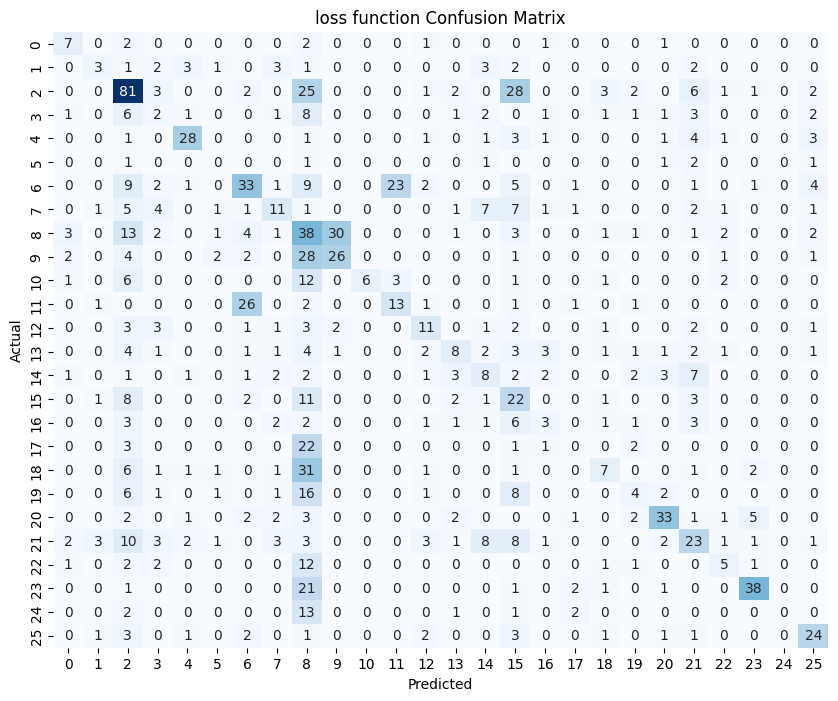

In [19]:
import xgboost

# DMatrix 객체 생성
dtrain = xgboost.DMatrix(X_train, label=y_train, weight=samples_weight)
dval = xgboost.DMatrix(X_val, label=y_val)

# XGBoost 파라미터 설정 (multi:softprob 사용)
params = {
    'objective': 'multi:softprob',  # 확률을 반환하는 objective 사용
    'num_class': len(set(y_train)),  # 클래스 수
    'eval_metric': 'mlogloss',  # 기본 평가 지표 설정
    'max_depth': 6,
    'learning_rate': 0.01,
}

# 학습 및 조기 종료 설정
evals = [(dtrain, 'train'), (dval, 'eval')]  # 검증 데이터셋 추가

# 모델 학습
xgb = xgboost.train(
    params, 
    dtrain, 
    num_boost_round=10000, 
    evals=evals, 
    early_stopping_rounds=100, 
    verbose_eval=50
)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 예측
y_pred_prob = xgb.predict(dval)
y_pred = y_pred_prob.argmax(axis=1)  # 각 샘플에 대해 가장 높은 확률을 가진 클래스로 변환

# 평가
accuracy = accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average='macro')  # macro F1 스코어 계산
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")
print(f"Classification Report:\n{class_report}")

import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('loss function Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')  # 이미지 파일로 저장
plt.show()

In [ ]:
# 테스트 데이터 준비
X_test = test.drop(columns=['ID'])
X_test_filtered = X_test[final_gene_list]
dtest = xgboost.DMatrix(X_test_filtered)
y_pred_prob = xgb.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)  # 각 샘플에 대해 가장 높은 확률을 가진 클래스로 변환

# 제출 파일 준비
submission = pd.read_csv('data/sample_submission.csv')
print("predictions의 길이:", len(y_pred))
print("submission의 길이:", len(submission))

# 예측 결과 변환 및 저장
predictions_xgb = y_pred.ravel()  # 또는 predictions.flatten()
predictions_xgb = label_encoder.inverse_transform(predictions_xgb)

submission["SUBCLASS"] = predictions_xgb
submission.to_csv('xgb.csv', encoding='UTF-8-sig', index=False)

## CATBoost

In [28]:
from catboost import CatBoostClassifier, Pool


# CatBoost 모델 설정 및 학습
cat = CatBoostClassifier(
    iterations=20000,      
    learning_rate=0.03,    
    depth=6,             
    loss_function='MultiClassOneVsAll',  
    eval_metric='MultiClassOneVsAll',
    custom_metric=['F1'],    
    random_seed=42,
    verbose=50,       
    early_stopping_rounds=100 ,
    class_weights=class_weights,
    cat_features=list(range(X_train.shape[1]))  # 모든 특성을 범주형으로 설정
)

# CPool 객체 생성
train_pool = Pool(X_train, y_train, cat_features=[i for i in range(X_train.shape[1])])
val_pool = Pool(X_val, y_val, cat_features=[i for i in range(X_val.shape[1])])

# 학습 진행
cat.fit(train_pool, eval_set=val_pool)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# 예측
y_pred = cat.predict(val_pool)

# 평가
accuracy = accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average='macro')  # macro F1 스코어 계산
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")
print(f"Classification Report:\n{class_report}")

import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('class weight Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')  # 이미지 파일로 저장
plt.show()

0:	learn: 0.6680614	test: 0.6680480	best: 0.6680480 (0)	total: 14.7s	remaining: 3d 9h 28m 28s


KeyboardInterrupt: 

In [ ]:
# 테스트 데이터 준비
X_test = test.drop(columns=['ID'])
X_test_filtered = X_test[final_gene_list]
test_pool = Pool(X_test_filtered)
y_pred = cat.predict(test_pool)

# 제출 파일 준비
submission = pd.read_csv('data/sample_submission.csv')
print("predictions의 길이:", len(y_pred))
print("submission의 길이:", len(submission))

# 예측 결과 변환 및 저장
predictions_cat = y_pred.ravel()  # 또는 predictions.flatten()
predictions_cat = label_encoder.inverse_transform(predictions_cat)

submission["SUBCLASS"] = predictions_cat
submission.to_csv('cat.csv', encoding='UTF-8-sig', index=False)